## Sales analysis

In [16]:
import pandas as pd 
import os 

In [17]:
import os
print(os.getcwd())  # This prints the directory where Python is looking


c:\Users\nithi\OneDrive\Desktop\Data analyst notes\Projects\sales analysis with python\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data


#### Task 1: Merge the 12 months of sales data into a single CSV file

In [18]:
import os

# Use raw string (r"") to prevent escape sequence issues
path = r"c:\Users\nithi\OneDrive\Desktop\Data analyst notes\Projects\sales analysis with python\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data"

files = [file for file in os.listdir(path)]
print(files)  # Print to confirm files are listed


['all_data.csv', 'Sales_April_2019.csv', 'Sales_August_2019.csv', 'Sales_December_2019.csv', 'Sales_February_2019.csv', 'Sales_January_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv', 'Sales_March_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_September_2019.csv', 'Untitled-2.ipynb']


In [19]:
path = r"c:\Users\nithi\OneDrive\Desktop\Data analyst notes\Projects\sales analysis with python\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data"

# Check if the path exists before listing files
if os.path.exists(path):
    files = os.listdir(path)
    print("Files in Directory:", files)
else:
    print(f"Error: The directory '{path}' does not exist!")


Files in Directory: ['all_data.csv', 'Sales_April_2019.csv', 'Sales_August_2019.csv', 'Sales_December_2019.csv', 'Sales_February_2019.csv', 'Sales_January_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv', 'Sales_March_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_September_2019.csv', 'Untitled-2.ipynb']


In [5]:
path = r"c:\Users\nithi\OneDrive\Desktop\Data analyst notes\Projects\sales analysis with python\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data"

files = [f for f in os.listdir(path) if f.endswith(".csv")]  # Only include CSV files

all_months_data = pd.DataFrame()

for file in files:
    file_path = os.path.join(path, file)
    
    try:
        df = pd.read_csv(file_path, encoding="utf-8", on_bad_lines='skip')
        all_months_data = pd.concat([all_months_data, df])
    except Exception as e:
        print(f"❌ Error reading {file}: {e}")

# Save to a new CSV file
all_months_data.to_csv("all_data.csv", index=False)
print("✅ Data merged successfully!")


✅ Data merged successfully!


Read in updated dataframe 

In [6]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


Clean up the data 

Drop rows of NaN

In [7]:
all_data.dropna(inplace=True)  # Remove NaN values
all_data.reset_index(drop=True, inplace=True)  # Reset index and remove old index

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


Find 'Or' and delete it 

In [8]:
all_data = all_data[~all_data["Order Date"].fillna("").str.startswith("Or")]


Convert columns to correct type 

In [9]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # make int 
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # make float

### Augment data with additional columns 

#### Task2: Add additional column

In [51]:
all_data['month'] = all_data['Order Date'].str[0:2]
all_data['month'] = all_data['month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


#### Task3: Add a sales column

In [11]:
all_data['sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Task4: Add city column

In [31]:
def get_city(address):
    return address.split(',')[1]  # Ensure we clean up the city name

def get_state(address):
    return address.split(',')[2].split(' ')[1]  # Extract state part and clean up

# Apply the functions to create the 'city' and 'state' columns
all_data['city'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")

all_data.head()  # Check the output


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


Question 1:What was the best month for sales? How much was earned that month?

In [14]:
# Check the data types of your columns
print(all_data.dtypes)

# Convert 'month' column to a categorical type (if it's not already) for faster grouping
all_data['month'] = all_data['month'].astype('category')

# Convert other columns to the appropriate data types (e.g., if 'sales' is float, leave it as float)


Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
month                 int32
sales               float64
city                 object
dtype: object


In [52]:
# Drop duplicates (if any)
all_data = all_data.drop_duplicates()

# Group by 'month' and sum, explicitly setting 'observed'
results = all_data.groupby('month', observed=False).sum()  # Or use observed=True


In [54]:
# Convert the 'sales' column to integer type
all_data['sales'] = all_data['sales'].astype(int)


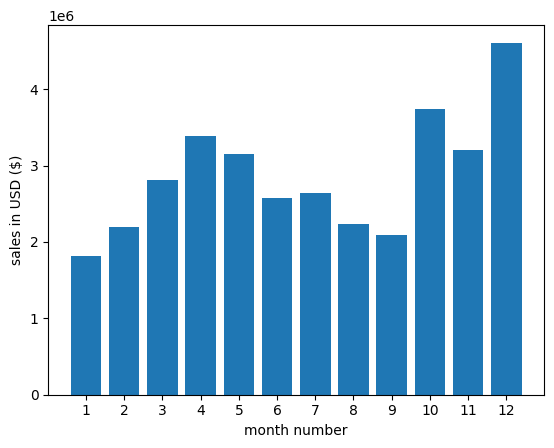

In [55]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months,results['sales'])
plt.xticks(months)
plt.ylabel('sales in USD ($)')
plt.xlabel('month number')
plt.show()

Question 2:What city had highest number of sales?


In [56]:
# Convert 'city' column to string if it's a category type
all_data['city'] = all_data['city'].astype(str)


In [57]:
results = all_data.groupby('city', observed=False).agg({
    'sales': 'sum',  # Sum for the 'sales' column
    # Add other columns and their corresponding aggregation methods if needed
})
results

,sales
city,
Atlanta (GA),2783272
Austin (TX),1810770
Boston (MA),3643916
Dallas (TX),2754436
Los Angeles (CA),5426396
New York City (NY),4643476
Portland (ME),447517
Portland (OR),1862630
San Francisco (CA),8221735


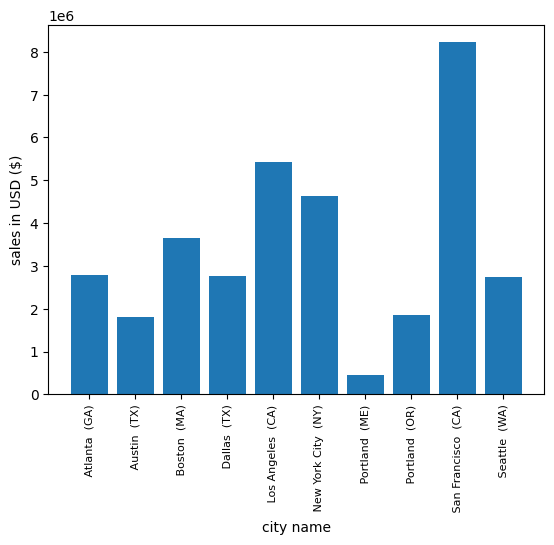

In [ ]:
import matplotlib.pyplot as plt

cities = [city for city,df in all_data.groupby('city')]

plt.bar(cities,results['sales'])
plt.xticks(cities,rotation='vertical',size=8)
plt.ylabel('sales in USD ($)')
plt.xlabel('city name')
plt.show()

Question 3: What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [63]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


In [66]:
all_data['hour'] = all_data['Order Date'].dt.hour
all_data['minute'] = all_data['Order Date'].dt.minute
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hour,minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23,Dallas (TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99,Boston (MA),22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600,Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11,Los Angeles (CA),14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11,Los Angeles (CA),9,27


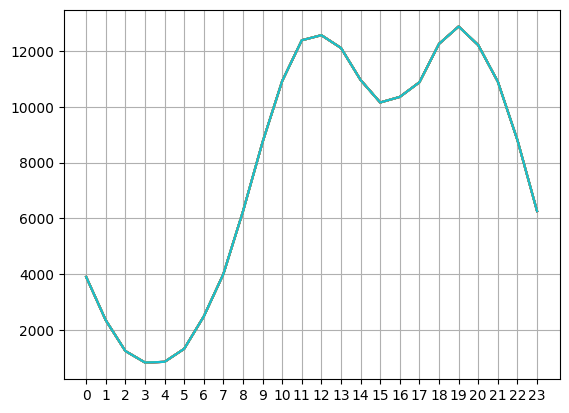

In [ ]:
hours = [hour for hour,df in all_data.groupby('hour')]

plt.plot(hours ,all_data.groupby(['hour']).count())
plt.xticks(hours)
plt.grid()
plt.show()

# My recommendation is around 11am (11) or 7pm (19)

Question 4 :What products are most often sold together?

In [82]:
df = all_data[all_data['Order Date'].duplicated(keep=False)]

df['grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ',' .join(x))

df = df[['Order ID','grouped']].drop_duplicates()
df.head(20)

C:\Users\nithi\AppData\Local\Temp\ipykernel_23920\2488330795.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ',' .join(x))


,Order ID,grouped
0,176558,USB-C Charging Cable
1,176559,Bose SoundSport Headphones
2,176560,"Google Phone,Wired Headphones"
4,176561,Wired Headphones
5,176562,USB-C Charging Cable
6,176563,Bose SoundSport Headphones
7,176564,USB-C Charging Cable
8,176565,Macbook Pro Laptop
9,176566,Wired Headphones
10,176567,Google Phone


In [88]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2 )))

for key, value in count.most_common(10):
    print(key,value)   

('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


Question 5:What product sold the most? Why do you think it sold the most?


In [ ]:
quantity_ordered = product_group.sum()['']


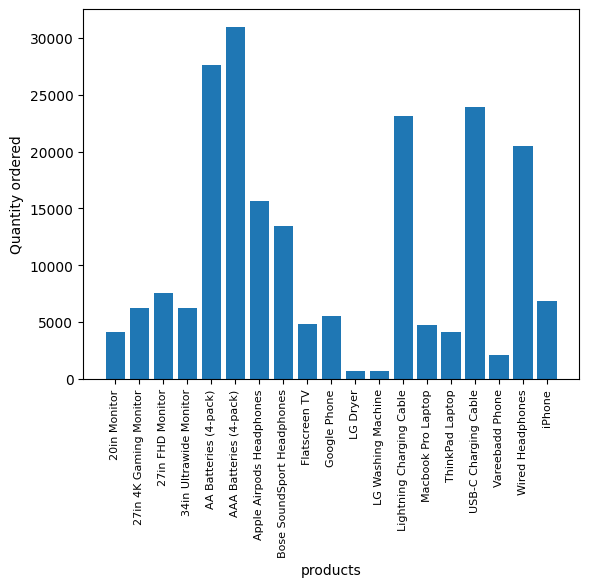

In [110]:
product_group = all_data.groupby('Product').sum(numeric_only=True)
quantity_ordered = product_group['Quantity Ordered']  # Extract the column correctly

products = product_group.index.tolist()  # Get product names

plt.bar(products,quantity_ordered)
plt.ylabel('Quantity ordered')
plt.xlabel('products')
plt.xticks(products,rotation='vertical',size=8)

plt.show()


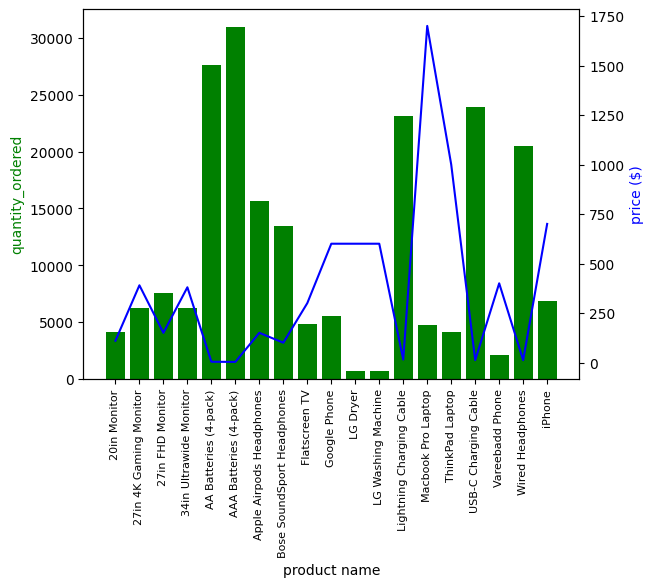

In [122]:
# Convert 'Price Each' column to numeric (if not already)
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')

# Now, perform the groupby operation
prices = all_data.groupby('Product')['Price Each'].mean()

fig, ax1 =  plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered,color='g')
ax2.plot(products,prices,'b-')

ax1.set_xlabel('product name')
ax1.set_ylabel( 'quantity_ordered',color='g')
ax2.set_ylabel( 'price ($)',color='b')
ax1.set_xticks(range(len(products)))  # Set tick positions
ax1.set_xticklabels(products, rotation='vertical',size=8)

plt.show()